# Homework 1 Solutions
Computational Physics Fall 2025 

# Problem 1: Coordinate Conversions

Let's do a straightforward implementation of this here in jupyter.

In [1]:
from math import sin, cos, atan2, sqrt, pi  # Import the necessary math functions hehe
DEG_TO_RAD = pi/180                         # Conversion factor from Degrees to radians  

# From Spherical
def to_cartesian(r:float, theta:float, phi:float):
    return [r*sin(theta*DEG_TO_RAD)*cos(phi*DEG_TO_RAD), r*sin(theta*DEG_TO_RAD)*sin(phi*DEG_TO_RAD), r*cos(theta*DEG_TO_RAD)]

# From Cartesian
def to_spherical(x:float, y:float, z:float):
    return [sqrt(x**2 + y**2 + z**2), atan2(sqrt(x**2 + y**2),z)/DEG_TO_RAD,atan2(y,x)/DEG_TO_RAD]

# Now let's create the part that asks the user about it
def ask_user():
    print("Hello! Do you want to change to cartesian or to spherical?")
    conversion = input("Enter either cartesian, or spherical")

    match conversion:
        case "spherical":
            print("Please enter the coordinates you want to convert")
            x = float(input("x: "))
            y = float(input("y: "))
            z = float(input("z: "))
            print("Your converted coordinates are:\n\t[r,theta,phi] =",to_spherical(x,y,z))
            return
        
        case "cartesian":
            print("Please enter the coordinates you want to convert")
            x = float(input("r: "))
            y = float(input("theta: "))
            z = float(input("phi: "))
            print("Your converted coordinates are:\n\t[x,y,z] =",to_cartesian(x,y,z))
            return

        case _:
            print("Please enter either cartesian or sphereical in the prompt")
            ask_user()
            return

ask_user()

Hello! Do you want to change to cartesian or to spherical?
Please enter the coordinates you want to convert
Your converted coordinates are:
	[x,y,z] = [0.017449748351250485, 0.00030458649045213493, 0.9998476951563913]


# Problem 2: Quantum Tunneling

In this problem we pretend to be a quantum physicist who has done the interesting part of their job, which is solving for the probabilities and now we just need to plug them in.

In [2]:
import numpy as np      # For arrays and file handling 

# Here are some global constants
ev_J    = 1.60218e-19   # J
hbar    = 6.62607e-34   # m^2 kg/s
E       = 10 * ev_J     # J
m       = 9.11e-31      # kg

# Coefficients
def get_coefficients(m:float, E:float ,V:float):
    k1 = sqrt(2*m*E)/hbar
    k2 = sqrt(2*m*(E-V))/hbar

    # Returns [T,R]
    return [4*k1*k2/(k1+k2)**2, ((k1-k2)/(k1+k2))**2]

# Create an array with all the values
data    = np.array([[V,*get_coefficients(m, E, V)] for V in np.linspace(0,E,50)])
header  = "V,T,R"

# Export into a file
np.savetxt('Coefficients.csv', data, delimiter = ',', header = header, comments = '')

# Problem 3: NaCl

We have a triple for loop, this would take centuries to execute. So we can use one small optimization technique to get things going a bit faster.

Notice that if we want to calculate it for the surface of a cube centered at 0, each face contributes the same amount to the sum. We just need to take care of double counting the edges. 

In [3]:
# Let's define the function that takes (i,j,k) and gives us the corresponding term
term = lambda i,j,k: 1/sqrt(i**2 + j**2 + k**2)

# We can add the terms by cubes of "radius" L
M       = 0
L       = 1
M_array = []
while True:
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if (L + j + k) % 2 == 0:
                M += 6*term(L,j,k)  # Accounts for the faces
            else:
                M -= 6*term(L,j,k)  # Accounts for the faces

        if j % 2 == 0:
            M -= 12*term(L,L,j)     # Accounts for the double counted edges
        else:
            M += 12*term(L,L,j)     # Accounts for the double counted edges
        
    if L % 2 == 0:
        M += 8*term(L,L,L)          # Accounts for missing the corners
    else:
        M -= 8*term(L,L,L)          # Accounts for missing the corners    
    
    # Keep all of our calculations in an array to check what we're doing
    M_array.append(M)

    # Exit condition
    if abs(term(L,L,L)) <= abs(0.001*M):
        break
    else:
        L+=1

print("The constant is: %.2f"%M)

The constant is: -1.75


(0.0, 331.0)

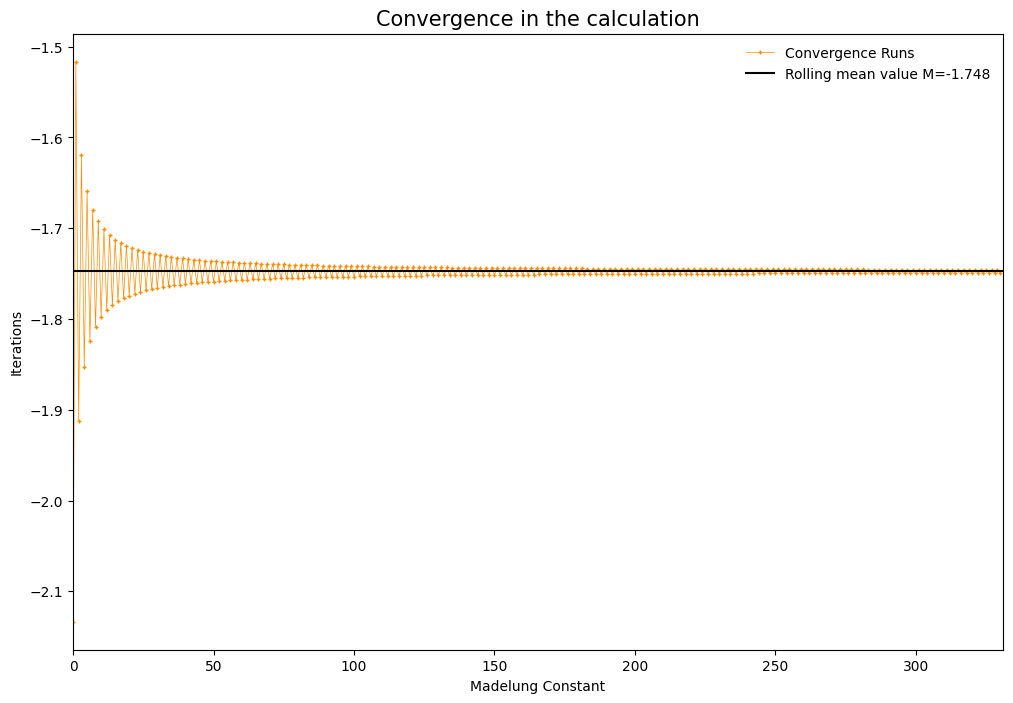

In [4]:
# Print the convergence plot
import matplotlib.pyplot as plt

# PLOTTING ---------------------------------------------------
fig = plt.figure(figsize=(12,8))
ax  = fig.add_subplot(111)

# Add the plot elements
rolling_mean = np.mean(M_array[-150:])
ax.plot(np.arange(len(M_array)), M_array, c='darkorange', marker='+', ms=3, lw=0.5, label = "Convergence Runs")
ax.axhline(y=rolling_mean, c='k', label = "Rolling mean value M=%.3f"%rolling_mean)

# Some prettification steps
ax.set_title("Convergence in the calculation",fontsize=15)
ax.set_ylabel("Iterations")
ax.set_xlabel("Madelung Constant")
ax.legend(frameon=False)
ax.set_xlim(0,len(M_array))

# Problem 4: Fibonacci Sequence

I mean come on! Here it is!

In [5]:
# Here is a recursive function!
fibs = {0:1, 1:1}
def fib(x):
    if x in fibs:
        return fibs[x]
    fibs[x] = fib(x-1) + fib(x-2)
    return fibs[x]

# And here is the term we're looking for!
print("Here is the 58th term:", fib(58))

Here is the 58th term: 956722026041
